In [ ]:
import Logistic_Regression_Environments as Logistic_regression_env
import copy
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, DDPG
from Logistic_Regression_Environments import LogisticRegressionEnv, SmallNN, JupyterNotebookPlotCallback, test_adam, test_l2o_agent, testing, generate_dataset, testing_adam, test_l2o_agent_with_rmsprop
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, DDPG
import matplotlib.pyplot as plt
import copy
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim

/Users/I761836/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
training_set = generate_dataset(5)
train_env = LogisticRegressionEnv(training_set)
testing_set = generate_dataset(20)
testing_set = torch.load("tensor_list.pt")
test_env = LogisticRegressionEnv(testing_set)

In [4]:
#sac_agent = SAC.load("SAC_Agent_Logistic_Regression")
sac_agent = SAC("MlpPolicy", train_env, verbose=1, learning_rate=1e-4)
ddpg_agent = DDPG.load("DDPG_Agent_Logistic_Regression")
ppo_agent = PPO.load("PPO_Agent_Logistic_Regression")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [5]:
sac_agent.set_env(train_env)
ddpg_agent.set_env(train_env)
ppo_agent.set_env(train_env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


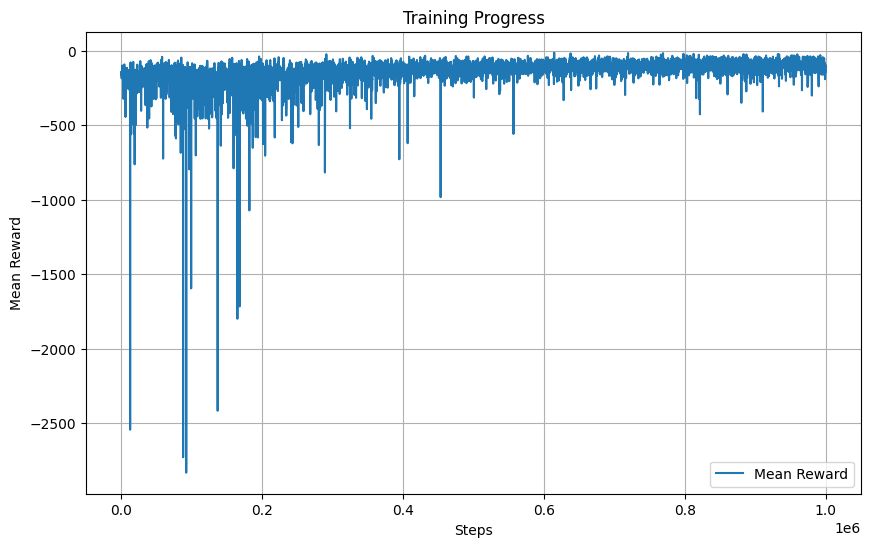

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -96.8    |
| time/              |          |
|    episodes        | 5000     |
|    fps             | 194      |
|    time_elapsed    | 5148     |
|    total_timesteps | 1000000  |
| train/             |          |
|    actor_loss      | 30.5     |
|    critic_loss     | 5.62     |
|    ent_coef        | 0.00851  |
|    ent_coef_loss   | -1.03    |
|    learning_rate   | 0.0001   |
|    n_updates       | 999899   |
---------------------------------


In [6]:
callback_sac = JupyterNotebookPlotCallback()
sac_agent.ent_coef = 0.025
sac_agent.learn(total_timesteps=1e6, callback = callback_sac)

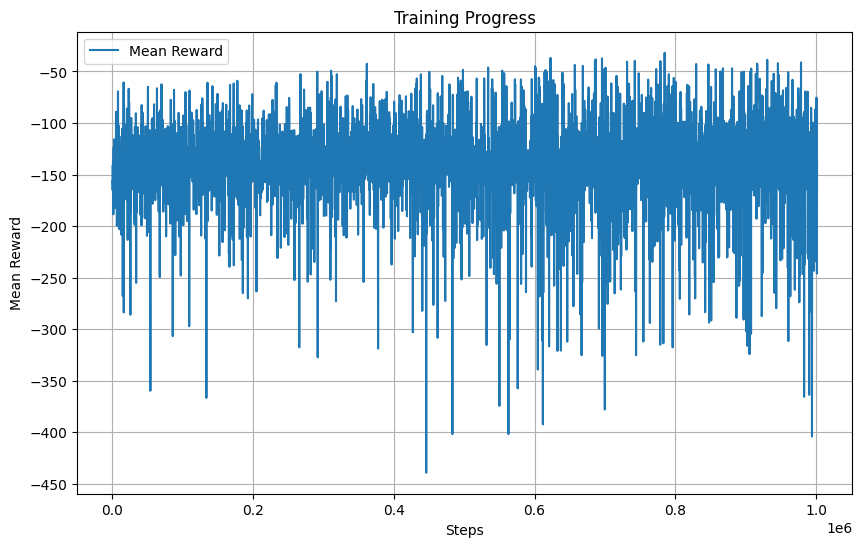

In [6]:
callback_ppo = JupyterNotebookPlotCallback()
ppo_agent.clip_range = lambda _: 0.3
ppo_agent.learn(total_timesteps=1e6, callback = callback_ppo)

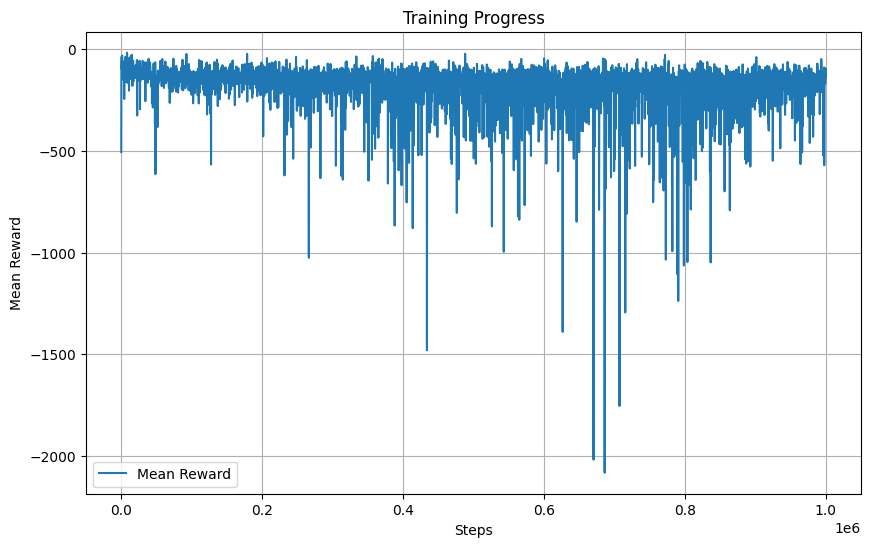

In [7]:
callback_ddpg = JupyterNotebookPlotCallback()
ddpg_agent.learn(total_timesteps = 1e6, callback = callback_ddpg)

In [7]:
sac_agent.save("SAC_Agent_Logistic_Regression1")
ddpg_agent.save("DDPG_Agent_Logistic_Regression1")
ppo_agent.save("PPO_Agent_Logistic_Regression1")

In [11]:
base_model = SmallNN()
sac_agent.set_env(test_env)
ddpg_agent.set_env(test_env)
ppo_agent.set_env(test_env)

sac_loss, sac_acc = testing(testing_set, sac_agent, copy.deepcopy(base_model))
ddpg_loss, ddpg_acc = testing(testing_set, ddpg_agent, copy.deepcopy(base_model))
ppo_loss, ppo_acc = testing(testing_set, ppo_agent, copy.deepcopy(base_model))
adam_loss, adam_acc = testing_adam(testing_set, base_model)

/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [13]:
def testing1(testing_set, agent, base_model):
    env = LogisticRegressionEnv(testing_set)
    num_datasets = len(testing_set)
    
    losses_all = []
    acc_all = []

    for data in testing_set:
        X_test, y_test = data
        loss, acc = test_l2o_agent(env, X_test, y_test, copy.deepcopy(base_model), agent)

        loss = np.array(loss[:200])  
        acc = np.array(acc[:200])

        if len(loss) < 200:
            loss = np.pad(loss, (0, 200 - len(loss)), 'edge')
        if len(acc) < 200:
            acc = np.pad(acc, (0, 200 - len(acc)), 'edge')

        losses_all.append(loss)
        acc_all.append(acc)

    losses_all = np.array(losses_all)
    acc_all = np.array(acc_all)
    avg_losses = np.mean(losses_all, axis=0)
    avg_acc = np.mean(acc_all, axis=0)

    var_losses = np.var(losses_all, axis=0)
    var_acc = np.var(acc_all, axis=0)

    return avg_losses, avg_acc, var_losses, var_acc

def testing2(testing_set, agent, base_model):
    env = LogisticRegressionEnv(testing_set)
    num_datasets = len(testing_set)
    
    losses_all = []
    acc_all = []

    for data in testing_set:
        X_test, y_test = data
        loss, acc = test_l2o_agent_with_rmsprop(env, X_test, y_test, copy.deepcopy(base_model), agent)

        loss = np.array(loss[:200])  
        acc = np.array(acc[:200])

        if len(loss) < 200:
            loss = np.pad(loss, (0, 200 - len(loss)), 'edge')
        if len(acc) < 200:
            acc = np.pad(acc, (0, 200 - len(acc)), 'edge')

        losses_all.append(loss)
        acc_all.append(acc)

    losses_all = np.array(losses_all)
    acc_all = np.array(acc_all)
    avg_losses = np.mean(losses_all, axis=0)
    avg_acc = np.mean(acc_all, axis=0)

    var_losses = np.var(losses_all, axis=0)
    var_acc = np.var(acc_all, axis=0)

    return avg_losses, avg_acc, var_losses, var_acc

def test_rmsprop(X_test, y_test, base_model, lr=0.01, alpha=0.99, num_steps=200):
    """
    Test the base model using RMSProp optimizer on the given test set.

    Parameters:
    - X_test: Input features (tensor)
    - y_test: True labels (tensor)
    - base_model: PyTorch model to be optimized
    - lr: Learning rate for RMSProp (default 0.01)
    - alpha: Smoothing constant for RMSProp (default 0.99)
    - num_steps: Number of optimization steps (default 200)

    Returns:
    - rmsprop_loss_values: List of loss values per step
    - rmsprop_acc_values: List of accuracy values per step
    """
    rmsprop_model = base_model
    rmsprop_loss_values = []
    rmsprop_acc_values = []
    rmsprop_optimizer = optim.RMSprop(rmsprop_model.parameters(), lr=lr, alpha=alpha)
    
    with torch.no_grad():
        initial_outputs = rmsprop_model(X_test)
        initial_loss = nn.BCELoss()(initial_outputs, y_test).item()
        initial_predictions = (initial_outputs >= 0.5).float()
        initial_accuracy = (initial_predictions == y_test).float().mean().item()
    
    rmsprop_loss_values.append(initial_loss)
    rmsprop_acc_values.append(initial_accuracy)
    
    for epoch in range(num_steps):  
        rmsprop_optimizer.zero_grad()
        outputs = rmsprop_model(X_test)
        loss = nn.BCELoss()(outputs, y_test)
        loss.backward()
        rmsprop_optimizer.step()
        rmsprop_loss_values.append(loss.item())
        
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean().item()
        rmsprop_acc_values.append(accuracy)

    return rmsprop_loss_values, rmsprop_acc_values

def testing_rmsprop(testing_set, base_model, lr=0.005, alpha=0.99, num_steps=200):
    """
    Test RMSProp optimizer on multiple datasets and compute the average loss and accuracy.

    Parameters:
    - testing_set: List of (X_test, y_test) tuples
    - base_model: PyTorch model to be optimized
    - lr: Learning rate for RMSProp (default 0.01)
    - alpha: Smoothing constant for RMSProp (default 0.99)
    - num_steps: Number of optimization steps (default 200)

    Returns:
    - avg_losses: Averaged loss values per step (array of shape [200])
    - avg_acc: Averaged accuracy values per step (array of shape [200])
    """
    num_datasets = len(testing_set)

    losses_sum = np.zeros(200)
    acc_sum = np.zeros(200)

    for X_test, y_test in testing_set:
        rmsprop_loss, rmsprop_acc = test_rmsprop(X_test, y_test, copy.deepcopy(base_model), lr, alpha, num_steps)
        
        losses_sum += np.array(rmsprop_loss)[:200]
        acc_sum += np.array(rmsprop_acc)[:200]

    return losses_sum / num_datasets, acc_sum / num_datasets

def test_sgd(X_test, y_test, base_model, lr=0.01, momentum=0.9, num_steps=200):
    """
    Test the base model using SGD optimizer on the given test set.

    Parameters:
    - X_test: Input features (tensor)
    - y_test: True labels (tensor)
    - base_model: PyTorch model to be optimized
    - lr: Learning rate for SGD (default 0.01)
    - momentum: Momentum for SGD optimizer (default 0.9)
    - num_steps: Number of optimization steps (default 200)

    Returns:
    - sgd_loss_values: List of loss values per step
    - sgd_acc_values: List of accuracy values per step
    """
    sgd_model = base_model
    sgd_loss_values = []
    sgd_acc_values = []
    sgd_optimizer = optim.SGD(sgd_model.parameters(), lr=lr, momentum=momentum)
    
    with torch.no_grad():
        initial_outputs = sgd_model(X_test)
        initial_loss = nn.BCELoss()(initial_outputs, y_test).item()
        initial_predictions = (initial_outputs >= 0.5).float()
        initial_accuracy = (initial_predictions == y_test).float().mean().item()
    
    sgd_loss_values.append(initial_loss)
    sgd_acc_values.append(initial_accuracy)
    
    for epoch in range(num_steps):  
        sgd_optimizer.zero_grad()
        outputs = sgd_model(X_test)
        loss = nn.BCELoss()(outputs, y_test)
        loss.backward()
        sgd_optimizer.step()
        sgd_loss_values.append(loss.item())
        
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test).float().mean().item()
        sgd_acc_values.append(accuracy)

    return sgd_loss_values, sgd_acc_values

def testing_sgd(testing_set, base_model, lr=0.01, momentum=0.9, num_steps=200):
    """
    Test SGD optimizer on multiple datasets and compute the average loss and accuracy.

    Parameters:
    - testing_set: List of (X_test, y_test) tuples
    - base_model: PyTorch model to be optimized
    - lr: Learning rate for SGD (default 0.01)
    - momentum: Momentum factor for SGD (default 0.9)
    - num_steps: Number of optimization steps (default 200)

    Returns:
    - avg_losses: Averaged loss values per step (array of shape [200])
    - avg_acc: Averaged accuracy values per step (array of shape [200])
    """
    num_datasets = len(testing_set)

    losses_sum = np.zeros(200)
    acc_sum = np.zeros(200)

    for X_test, y_test in testing_set:
        sgd_loss, sgd_acc = test_sgd(X_test, y_test, copy.deepcopy(base_model), lr, momentum, num_steps)
        
        losses_sum += np.array(sgd_loss)[:200]
        acc_sum += np.array(sgd_acc)[:200]

    return losses_sum / num_datasets, acc_sum / num_datasets

In [14]:
sac_loss, sac_acc, sac_var_loss, sac_var_acc = testing1(testing_set, sac_agent, copy.deepcopy(base_model))
ddpg_loss, ddpg_acc, ddpg_var_loss, ddpg_var_acc = testing1(testing_set, ddpg_agent, copy.deepcopy(base_model))
ddpg_loss1, ddpg_acc1, ddpg_var_loss1, ddpg_var_acc1 = testing2(testing_set, ddpg_agent, copy.deepcopy(base_model))
ppo_loss, ppo_acc, ppo_var_loss, ppo_var_acc = testing1(testing_set, ppo_agent, copy.deepcopy(base_model))
sgd_loss, sgd_acc = testing_sgd(testing_set, base_model)
adam_loss, adam_acc = testing_adam(testing_set, base_model)
rmsp_loss, rmsp_acc = testing_rmsprop(testing_set, base_model)

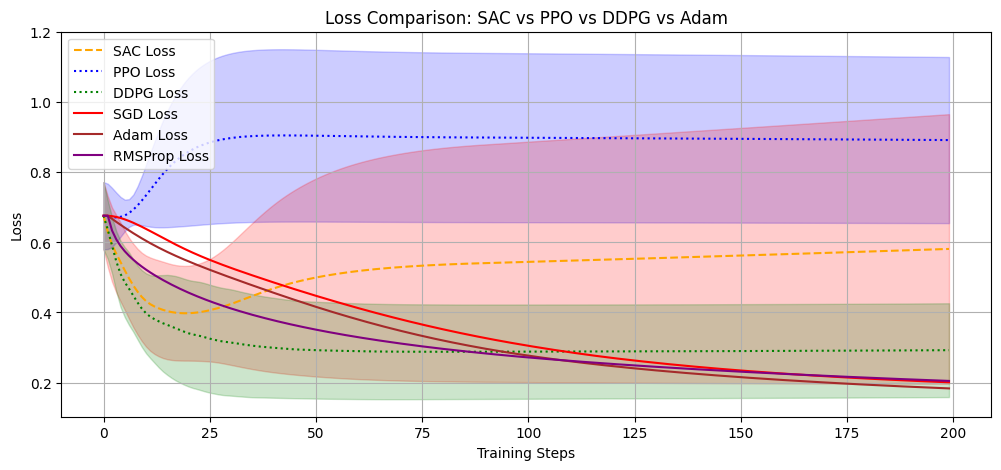

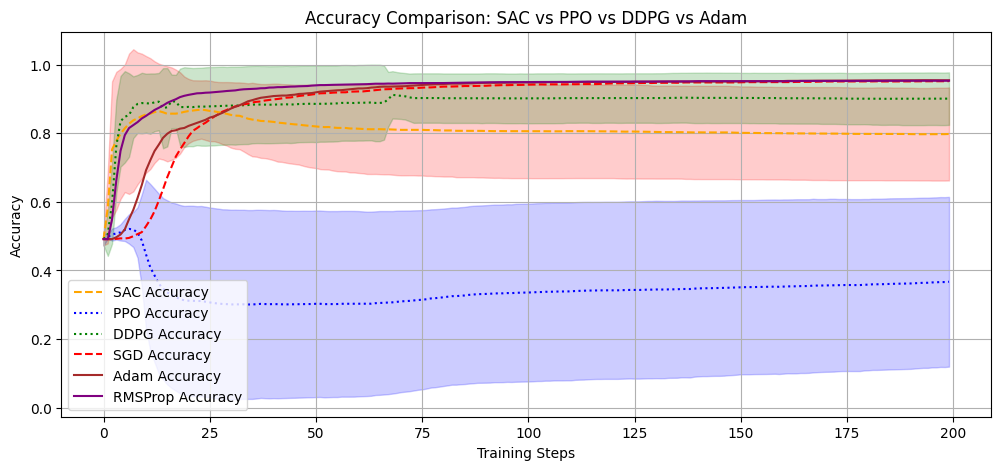

In [15]:
sac_loss_std = np.sqrt(sac_var_loss)
sac_acc_std = np.sqrt(sac_var_acc)

ddpg_loss_std = np.sqrt(ddpg_var_loss)
ddpg_acc_std = np.sqrt(ddpg_var_acc)

ppo_loss_std = np.sqrt(ppo_var_loss)
ppo_acc_std = np.sqrt(ppo_var_acc)

plt.figure(figsize=(12, 5))
plt.plot(sac_loss, label='SAC Loss', linestyle='dashed', color='orange')
plt.plot(ppo_loss, label='PPO Loss', linestyle='dotted', color='blue')
plt.plot(ddpg_loss, label='DDPG Loss', linestyle='dotted', color='green')
plt.plot(sgd_loss, label='SGD Loss', linestyle='solid', color='red')
plt.plot(adam_loss, label='Adam Loss', linestyle='solid', color='brown')
plt.plot(rmsp_loss, label='RMSProp Loss', linestyle='solid', color='purple')

plt.fill_between(range(len(ppo_loss)), ppo_loss - ppo_loss_std, ppo_loss + ppo_loss_std, alpha=0.2, color='blue')
plt.fill_between(range(len(sac_loss)), sac_loss - sac_loss_std, sac_loss + sac_loss_std, alpha=0.2, color='red')
plt.fill_between(range(len(ddpg_loss)), ddpg_loss - ddpg_loss_std, ddpg_loss + ddpg_loss_std, alpha=0.2, color='green')

plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss Comparison: SAC vs PPO vs DDPG vs Adam')
plt.legend()
plt.grid()
plt.savefig('Logistic_Regression_Loss')
plt.show()

# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(sac_acc, label='SAC Accuracy', linestyle='dashed', color='orange')
plt.plot(ppo_acc, label='PPO Accuracy', linestyle='dotted', color='blue')
plt.plot(ddpg_acc, label='DDPG Accuracy', linestyle='dotted', color='green')
plt.plot(sgd_acc, label='SGD Accuracy', linestyle='dashed', color='red')
plt.plot(adam_acc, label='Adam Accuracy', linestyle='solid', color='brown')
plt.plot(rmsp_acc, label='RMSProp Accuracy', linestyle='solid', color='purple')

plt.fill_between(range(len(ppo_acc)), ppo_acc - ppo_acc_std, ppo_acc + ppo_acc_std, alpha=0.2, color='blue')
plt.fill_between(range(len(sac_acc)), sac_acc - sac_acc_std, sac_acc + sac_acc_std, alpha=0.2, color='red')
plt.fill_between(range(len(ddpg_acc)), ddpg_acc - ddpg_acc_std, ddpg_acc + ddpg_acc_std, alpha=0.2, color='green')

plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SAC vs PPO vs DDPG vs Adam')
plt.legend()
plt.grid()
plt.savefig('Logistic_Regression_Accuracy')
plt.show()